In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [2]:
df = pd.read_csv('./data/temps.csv')
df.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [3]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [4]:
df.shape

(348, 12)

In [6]:
df = pd.get_dummies(df)

In [9]:
df.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [12]:
labels = np.array(df['actual'])
df = df.drop('actual', axis =1)
feature_list = list(df.columns)
df = np.array(df)

In [16]:
train_df, test_df, train_labels, test_labels = train_test_split(df, 
                                                                labels,
                                                               test_size =0.20,
                                                               random_state = 42)

In [17]:
baseline_preds = test_df[:,feature_list.index('average')]
baseline_errors = abs(baseline_preds - test_labels)

print('Average basline error:', round(np.mean(baseline_errors),2))

Average basline error: 5.09


In [20]:
RFR_model = RandomForestRegressor(n_estimators= 1000,
                                 random_state = 42)
RFR_model.fit(train_df, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
predictions = RFR_model.predict(test_df)
errors = abs(predictions - test_labels)

print('Mean Absolute error:', round(np.mean(errors), 2), 'degrees')

Mean Absolute error: 3.88 degrees


In [23]:
# mean absolute percentage error 
mape = 100 * (errors/ test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy , 2), '%.')

Accuracy: 93.85 %.


In [37]:
importances = list(RFR_model.feature_importances_)
feature_importances = [(feature, round(importance,2)) for feature, 
                      importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, 
                             key = lambda x:x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: temp_1               Importance: 0.67
Variable: average              Importance: 0.15
Variable: forecast_acc         Importance: 0.05
Variable: forecast_noaa        Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


Text(0.5,1,'Variable Importance')

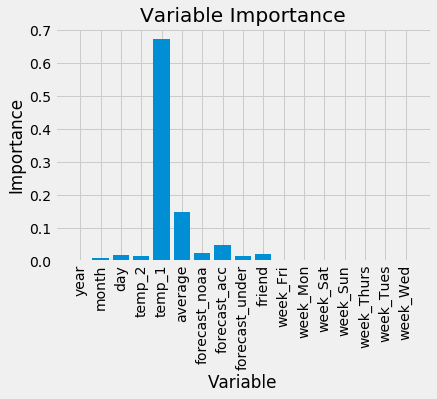

In [41]:
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importance')

Text(0.5,1,'Actual and Predicted Values')

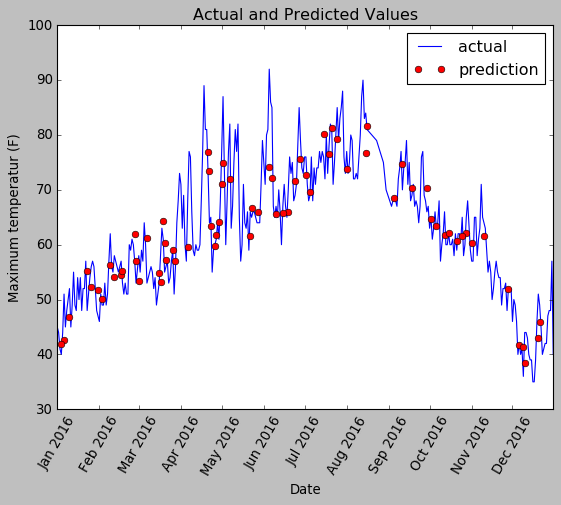

In [92]:
months = df[:, feature_list.index('month')]
days = df[:, feature_list.index('day')]
years = df[:, feature_list.index('year')]

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_df[:, feature_list.index('month')]
days = test_df[:, feature_list.index('day')]
years = test_df[:, feature_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction':predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label ='prediction')
plt.xticks(rotation = '60')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Maximum temperatur (F)')
plt.title('Actual and Predicted Values')


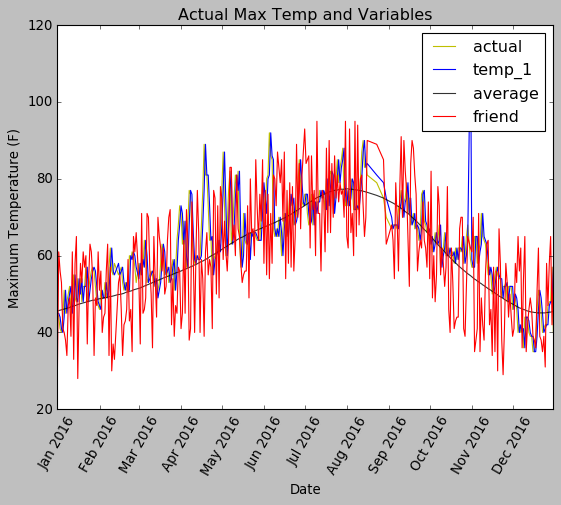

In [91]:

plt.style.use('classic')
true_data['temp_1'] = df[:, feature_list.index('temp_1')]
true_data['average'] = df[:, feature_list.index('average')]
true_data['friend'] = df[:, feature_list.index('friend')]

plt.plot(true_data['date'], 
         true_data['actual'], 
         'y-', 
         label = 'actual',
         alpha = 1.0)
plt.plot(true_data['date'],
         true_data['temp_1'],
         'b-',
         label = 'temp_1',
         alpha = 1.0)
plt.plot(true_data['date'],
         true_data['average'],
         'k-',
         label = 'average',
         alpha = 0.8)
plt.plot(true_data['date'],
         true_data['friend'],
         'r-',
         label = 'friend')

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (F)')
plt.title('Actual Max Temp and Variables');